#1. 순환신경망(Recurrent Neural Network)
- 순차 데이터의 학습을 위한 인공신경망
- 텍스트, 시계열 데이터와 같이 순서에 의미가 있는 데이터
- 연속적인 데이터는 과거 데이터와 현재 데이터간 상관 관계를 가진다.

##Layer
- 출력 과정에서 다음 layer뿐만 아니라 같은 layer에 있는 node들에게 출력한다
- 그만큼 학습해야할 가중치가 증가함
- Activation을 tanh 사용

##텍스트 데이터
- (1,3,5)는 샘플 수, 시퀀스 길이(토큰), 엠베딩 길이로 표현됨
- 엠베딩 -> Text를 숫자로 나타내는 작업


#2. LSTM
- RNN의 Gradient 소실 문제를하해결하기 위해 고안됨





#NLP
- NLU(이해), NLG(생성)을 합침
- 인코더, 디코더에 해당됨


#Transformer
- 데이터를 순차적으로 넣지않고, 한 번에 집어넣음(Postioning)

#주식 예측

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
samsung = pd.read_csv('/005930.KS.csv')

In [6]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5900 non-null   object 
 1   Open       5900 non-null   float64
 2   High       5900 non-null   float64
 3   Low        5900 non-null   float64
 4   Close      5900 non-null   float64
 5   Adj Close  5900 non-null   float64
 6   Volume     5900 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 322.8+ KB


In [8]:
samsung['Date'] = pd.to_datetime(samsung['Date'])

In [9]:
samsung.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4537.111816,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4143.546875,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4173.249512,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4113.845215,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4284.636230,46880000


In [10]:
#날짜를 인덱사로 사용함
samsung = samsung.set_index('Date')

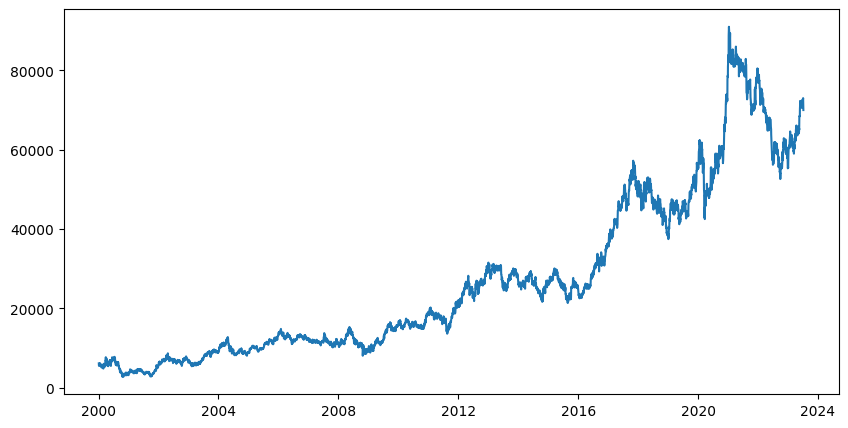

In [11]:
plt.figure(figsize = (10,5))
plt.plot(samsung.index, samsung['Close'])
plt.show()

##Feature Engineering

In [13]:
#Moving Average
samsung['MA5'] = np.around(samsung['Close'].rolling(window = 5).mean(),0)
samsung.head()

,Open,High,Low,Close,Adj Close,Volume,MA5
Date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4537.111816,74195000,NaN
2000-01-05,5800.0,6060.0,5520.0,5580.0,4143.546875,74680000,NaN
2000-01-06,5750.0,5780.0,5580.0,5620.0,4173.249512,54390000,NaN
2000-01-07,5560.0,5670.0,5360.0,5540.0,4113.845215,40305000,NaN
2000-01-10,5600.0,5770.0,5580.0,5770.0,4284.636230,46880000,5724.0


In [14]:
samsung['MA3'] = np.around(samsung['Close'].rolling(window = 3).mean(),0)
samsung.head()

,Open,High,Low,Close,Adj Close,Volume,MA5,MA3
Date,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4537.111816,74195000,NaN,NaN
2000-01-05,5800.0,6060.0,5520.0,5580.0,4143.546875,74680000,NaN,NaN
2000-01-06,5750.0,5780.0,5580.0,5620.0,4173.249512,54390000,NaN,5770.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4113.845215,40305000,NaN,5580.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4284.636230,46880000,5724.0,5643.0


In [15]:
samsung['mid'] = (samsung['High'] + samsung['Low']) / 2.
samsung.head()

,Open,High,Low,Close,Adj Close,Volume,MA5,MA3,mid
Date,,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4537.111816,74195000,NaN,NaN,5885.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4143.546875,74680000,NaN,NaN,5790.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4173.249512,54390000,NaN,5770.0,5680.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4113.845215,40305000,NaN,5580.0,5515.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4284.636230,46880000,5724.0,5643.0,5675.0


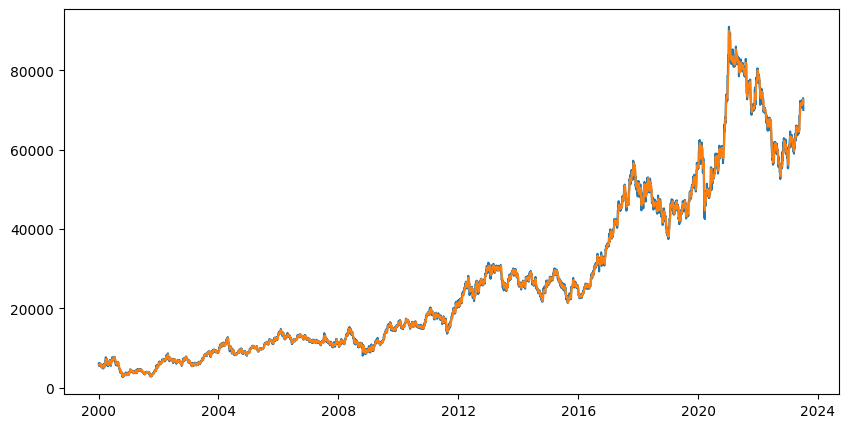

In [16]:
plt.figure(figsize = (10,5))
plt.plot(samsung.index, samsung['Close'])
plt.plot(samsung.index, samsung['MA5'])
plt.show()

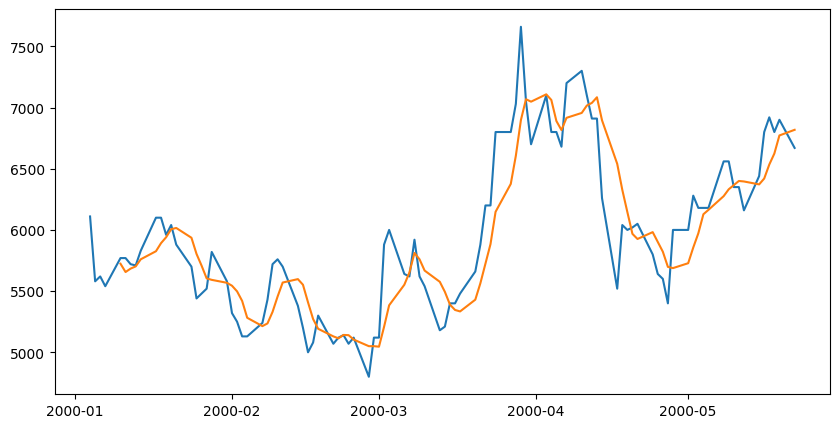

In [17]:
x = samsung.iloc[:100,:]

plt.figure(figsize = (10,5))
plt.plot(x.index, x['Close'])
plt.plot(x.index, x['MA5'])
plt.show()

In [18]:
samsung.describe().T
#거래를 전혀 안한 날이 존재함

,count,mean,std,min,25%,50%,75%,max
Open,5900.0,2.663828e+04,2.117143e+04,2540.000000,1.040000e+04,1.830000e+04,4.245000e+04,9.030000e+04
High,5900.0,2.690016e+04,2.133858e+04,2760.000000,1.059500e+04,1.850000e+04,4.280000e+04,9.680000e+04
Low,5900.0,2.636790e+04,2.099091e+04,2420.000000,1.030000e+04,1.813000e+04,4.190000e+04,8.950000e+04
Close,5900.0,2.663116e+04,2.115385e+04,2730.000000,1.045500e+04,1.832000e+04,4.245250e+04,9.100000e+04
Adj Close,5900.0,2.309068e+04,2.065861e+04,2027.219604,7.848329e+03,1.438526e+04,3.722628e+04,8.671730e+04
Volume,5900.0,2.134631e+07,1.525241e+07,0.000000,1.168830e+07,1.726852e+07,2.650181e+07,1.642150e+08
MA5,5896.0,2.662312e+04,2.113598e+04,2810.000000,1.047300e+04,1.830400e+04,4.245000e+04,8.996000e+04
MA3,5898.0,2.662723e+04,2.114485e+04,2790.000000,1.048175e+04,1.833650e+04,4.232900e+04,9.043300e+04
mid,5900.0,2.663403e+04,2.116409e+04,2590.000000,1.045000e+04,1.831500e+04,4.236250e+04,9.315000e+04


In [19]:
samsung.isna().sum(axis = 0)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA5          4
MA3          2
mid          0
dtype: int64

In [20]:
samsung.loc[samsung['Volume'] == 0,['Volume']] = np.nan

In [21]:
samsung.isna().sum(axis = 0)

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       127
MA5            4
MA3            2
mid            0
dtype: int64

In [22]:
samsung = samsung.dropna()

In [23]:
samsung.shape

(5769, 9)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
MM = MinMaxScaler()
df_s = MM.fit_transform(samsung)

In [38]:
samsung.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA5', 'MA3',
       'mid'],
      dtype='object')

In [39]:
df_S = pd.DataFrame(df_s, columns = samsung.columns)

In [40]:
def make_sequence_dataset(X, y, window_size):
    feature_list = []
    label_list = []

    for i in range(len(X)-window_size):
        feature_list.append(X[i:i+window_size])
        label_list.append(y[i+window_size])

    return np.array(feature_list), np.array(label_list)

In [41]:
X = df_S.drop(['Close', 'Adj Close'], axis =1)
Y = df_S['Close']

X_data, Y_data = make_sequence_dataset(X,Y,20)

In [42]:
X_data.shape # 7개의 Feature를 가진 20개의 윈도우가 5749개 있음

(5749, 20, 7)

In [43]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2)
#이렇게 하면 안됨 -> 시계열 데이터인데 랜덤으로 뽑는거기 떄문에

In [47]:
train_size = int(len(X_data) * 0.8)
X_train = X_data[:train_size]
Y_train = Y_data[:train_size]

X_test = X_data[train_size:]
Y_test = Y_data[train_size:]

##모델구성


In [48]:
import tensorflow
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.LSTM(32, activation = 'tanh', input_shape = (20, 7)), #LSTM은 Flatten된 상태로 결과가 나옴
    layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5120      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse']
)

In [ ]:
Epochs = 100
Batch_size = 32

history = model.fit(
    X_train, Y_train,
    epochs = Epochs,
    batch_size = Batch_size,
    validation_split = 0.2,
    verbose = 1
)

In [ ]:
Y_pred = model.predict(X_test).reshape(-1)

##Stack LSTM


In [51]:
model = keras.Sequential([
    layers.LSTM(32, activation = 'tanh', return_sequences = True , input_shape = (20, 7)), #LSTM은 Flatten된 상태로 결과가 나옴, return_sequence는 Hidden state 값들을 얻어올 수 있음
    layers.LSTM(32, activation = 'tanh'),
    layers.Dense(1)
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 20, 32)            5120      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,473
Trainable params: 13,473
Non-trainable params: 0
_________________________________________________________________
